In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import mne
import os
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import numpy as np


In [2]:
subject = 1  # use data from subject 1
runs = [2]

files = eegbci.load_data(subject, runs, 'C:/Users/gille/Downloads/Compressed/files/S001')
#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
#Combine all loaded runs
raw_obj = concatenate_raws(raws)
raw_data = raw_obj.get_data()


Extracting EDF parameters from C:\Users\gille\Downloads\Compressed\files\S001\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


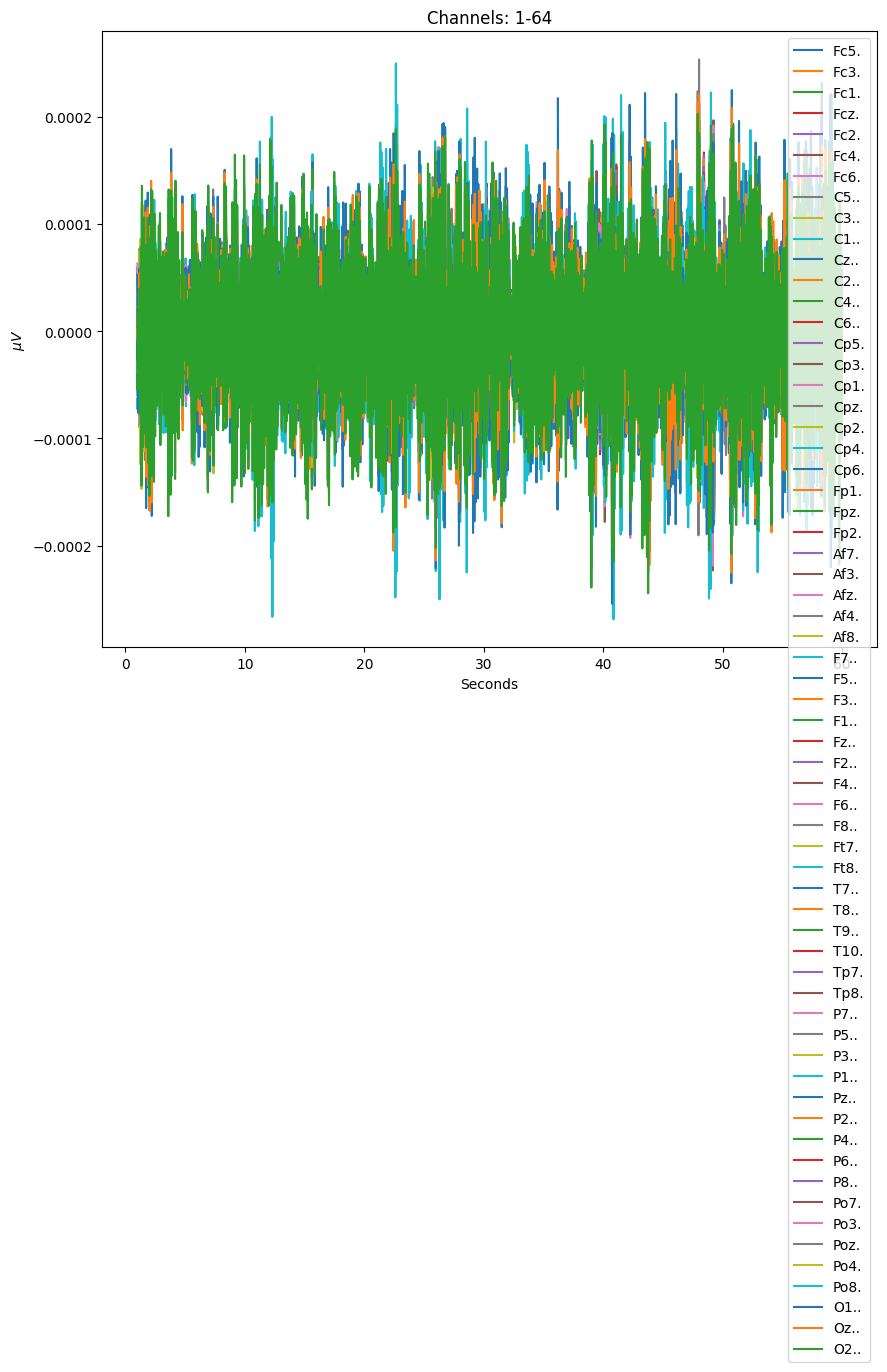

In [3]:
sfreq = raw_obj.info['sfreq']
sfreq = raw_obj.info['sfreq']
raw_obj.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')

data, times = raw_obj[:-1,int(sfreq * 1):int(sfreq * 60)]

fig = plt.subplots(figsize=(10,8))
plt.plot(times, data.T);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Channels: 1-64');
plt.legend(raw_obj.ch_names);

In [13]:
import pandas as pd

raw_data_df = pd.DataFrame()

for index in range(len(raw_data)):
    raw_data_df[index] = [float("{:f}".format(float(x)))*1000000 for x in raw_data[index]]

#raw_data_df.to_csv("raw_data2.csv")

for data_col in raw_data:
    a = list(data_col)[0]
    print(a)

raw_obj.to_data_frame().to_csv("raw_data2.csv")


-4.6e-05
-4.1e-05
-3.2e-05
-2.4e-05
-2.3e-05
-2.4e-05
-1.4999999999999999e-05
-4.1e-05
-2.9e-05
-2.9999999999999997e-05
-1.8999999999999998e-05
2e-06
-3e-06
9.999999999999999e-06
-2.4e-05
-1.7e-05
-1.8999999999999998e-05
-4e-06
2e-06
1.4999999999999999e-05
1.7e-05
-0.00011399999999999999
-9.999999999999999e-05
-9.8e-05
-0.000102
-9.6e-05
-6.3e-05
-9.9e-05
-0.000124
-6.9e-05
-5.1e-05
-2.4999999999999998e-05
-6.1e-05
-4.7e-05
-4.8e-05
-7.3e-05
-7.599999999999999e-05
-0.00010499999999999999
-6.599999999999999e-05
-1.8e-05
-3.5e-05
1.4e-05
-3.2e-05
1e-06
-5.2e-05
2.6e-05
-2.6e-05
-4.9999999999999996e-06
4.9999999999999996e-06
1.4999999999999999e-05
1.9999999999999998e-05
4.1e-05
3.4e-05
3.2e-05
4.4999999999999996e-05
1.8e-05
2.3e-05
4.9999999999999996e-05
6.9e-05
5.2e-05
5.4e-05
3.9999999999999996e-05
0.000108
5.4999999999999995e-05


In [14]:
d_frame=pd.read_csv('raw_data2.csv')  
d_frame.head()

,Unnamed: 0,time,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,...,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
0,0,0.00000,-1.355253e-14,0.000000,1.694066e-15,8.470329e-15,8.470329e-16,1.694066e-15,-2.541099e-15,0.000000,...,0.000000,-1.694066e-15,1.185846e-14,-6.776264e-15,3.388132e-15,3.388132e-14,8.470329e-15,9.317362e-15,2.371692e-14,2.032879e-14
1,1,0.00625,-9.266062e+00,-10.482734,-9.045237e+00,-7.581463e+00,-1.017082e+01,-1.527580e+01,-1.968632e+01,1.419822,...,3.338253,1.927351e+01,1.891341e+01,2.201655e+01,4.855234e+00,4.651925e+00,2.575979e+01,3.982513e+01,2.758343e+01,3.602047e+01
2,2,0.01250,-1.219702e+01,-12.096536,-9.751587e+00,-6.084719e+00,-8.999448e+00,-1.564017e+01,-1.904664e+01,2.565195,...,-2.794919,2.683072e+01,2.554967e+01,2.845473e+01,4.436957e+00,-2.466821e+00,4.382870e+01,6.213345e+01,3.972837e+01,5.478553e+01
3,3,0.01875,-8.927795e+00,-5.022257,-1.011426e+00,5.482302e+00,3.723745e+00,-1.534865e+00,-6.623813e-01,2.966957,...,-17.356179,2.069775e+01,1.891414e+01,1.700530e+01,-4.084100e+00,-2.178256e+01,4.742931e+01,5.852920e+01,3.056394e+01,4.830031e+01
4,4,0.02500,-4.577450e+00,2.933922,1.054992e+01,1.922342e+01,1.732139e+01,1.280866e+01,1.430646e+01,3.214662,...,-30.811997,8.081643e+00,7.151559e+00,-3.038907e+00,-2.118396e+01,-4.417947e+01,3.458733e+01,3.363776e+01,4.555393e+00,2.276810e+01


In [6]:
data = pd.read_csv("output.csv")
data.head()

,Unnamed: 0,time,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,...,P8..,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..
0,0,0.00000,116.0,66.0,40.0,25.0,25.0,77.0,67.0,27.0,...,21.0,13.0,1.0,86.0,-32.0,-22.0,13.0,-43.0,-13.0,35.0
1,1,0.00625,104.0,61.0,20.0,23.0,22.0,61.0,53.0,6.0,...,55.0,33.0,49.0,173.0,40.0,39.0,43.0,-3.0,45.0,38.0
2,2,0.01250,109.0,69.0,33.0,40.0,40.0,82.0,67.0,37.0,...,82.0,49.0,86.0,250.0,92.0,68.0,72.0,22.0,89.0,37.0
3,3,0.01875,111.0,74.0,46.0,51.0,42.0,87.0,71.0,25.0,...,112.0,74.0,122.0,307.0,133.0,97.0,102.0,37.0,117.0,35.0
4,4,0.02500,133.0,99.0,78.0,81.0,68.0,110.0,91.0,24.0,...,124.0,90.0,148.0,331.0,142.0,96.0,128.0,71.0,127.0,38.0


In [17]:
for c in data.columns:
    print(c)

Unnamed: 0
time
Fc5.
Fc3.
Fc1.
Fcz.
Fc2.
Fc4.
Fc6.
C5..
C3..
C1..
Cz..
C2..
C4..
C6..
Cp5.
Cp3.
Cp1.
Cpz.
Cp2.
Cp4.
Cp6.
Fp1.
Fpz.
Fp2.
Af7.
Af3.
Afz.
Af4.
Af8.
F7..
F5..
F3..
F1..
Fz..
F2..
F4..
F6..
F8..
Ft7.
Ft8.
T7..
T8..
T9..
T10.
Tp7.
Tp8.
P7..
P5..
P3..
P1..
Pz..
P2..
P4..
P6..
P8..
Po7.
Po3.
Poz.
Po4.
Po8.
O1..
Oz..
O2..
Iz..


In [15]:
data_filter = (d_frame[['time','Af7.','Af8.','Fpz.','T9..','T10.']]).rename(columns={'time':'Time','Af7.':'AF7','Af8.':'AF8','Fpz.':'FPZ','T9..':'TP9','T10.':'TP10'})
data_filter.head()

,Time,AF7,AF8,FPZ,TP9,TP10
0,0.00000,-6.776264e-15,1.016440e-14,1.694066e-15,1.355253e-14,-8.470329e-16
1,0.00625,4.308140e-01,-1.838993e+01,-6.334668e+00,1.574332e+00,1.289547e+01
2,0.01250,3.168841e+00,-1.979160e+01,-4.014521e+00,4.836282e+00,1.151597e+01
3,0.01875,5.727261e+00,-5.956094e+00,5.340982e+00,8.826813e+00,-2.238542e+00
4,0.02500,4.507150e+00,6.726522e+00,1.252652e+01,1.126137e+01,-1.298653e+01


In [18]:
#On divise les data en timeframe de taille 10
data_group =[]
l_data = []
for i,data in enumerate(data_filter.iterrows()):
    sub_list = data_filter.iterrows()[i:i+10]
    data_group.append(sub_list)

data_group



TypeError: 'generator' object is not subscriptable

In [19]:

#On crée un dictionnaire contenant tous les canux ainsi  que leurs différents données
def List_Canaux(dataf):
    canaux = {}
    if "Unnamed: 0" in dataf:
        dataf= dataf.drop("Unnamed: 0",axis = 1)
    for i in dataf.columns:
        if i not in canaux:
            canaux[i] = dataf[i].tolist()
    return canaux

#On subdivise les données de chaque canal en liste de taille 10 
def subdivision_Canaux(dict):
    for canal in dict :
        c_list = dict[canal]
        t_list = []
        for i in range(0,len(c_list),10):
            sub_list = c_list[i:i+10]
            t_list.append(sub_list)
        
        dict[canal] = t_list

    return dict

print(subdivision_Canaux(List_Canaux(data_filter)))

{'Time': [[0.0, 0.00625, 0.0125, 0.01875, 0.025, 0.03125, 0.0375, 0.04375, 0.05, 0.05625], [0.0625, 0.06875, 0.075, 0.08125, 0.0875, 0.09375, 0.1, 0.10625, 0.1125, 0.11875], [0.125, 0.13125, 0.1375, 0.14375, 0.15, 0.15625, 0.1625, 0.16875, 0.175, 0.18125], [0.1875, 0.19375, 0.2, 0.20625, 0.2125, 0.21875, 0.225, 0.23125, 0.2375, 0.24375], [0.25, 0.25625, 0.2625, 0.26875, 0.275, 0.28125, 0.2875, 0.29375, 0.3, 0.30625], [0.3125, 0.31875, 0.325, 0.33125, 0.3375, 0.34375, 0.35, 0.35625, 0.3625, 0.36875], [0.375, 0.38125, 0.3875, 0.39375, 0.4, 0.40625, 0.4125, 0.41875, 0.425, 0.43125], [0.4375, 0.44375, 0.45, 0.45625, 0.4625, 0.46875, 0.475, 0.48125, 0.4875, 0.49375], [0.5, 0.50625, 0.5125, 0.51875, 0.525, 0.53125, 0.5375, 0.54375, 0.55, 0.55625], [0.5625, 0.56875, 0.575, 0.58125, 0.5875, 0.59375, 0.6, 0.60625, 0.6125, 0.61875], [0.625, 0.63125, 0.6375, 0.64375, 0.65, 0.65625, 0.6625, 0.66875, 0.675, 0.68125], [0.6875, 0.69375, 0.7, 0.70625, 0.7125, 0.71875, 0.725, 0.73125, 0.7375, 0.74375],

In [20]:
#On crée un dictionnaire contenant tous les canux ainsi  que leurs différents données
#On subdivise les données de chaque canal en liste de taille 10 

def subdivision_CanauxL(dataf):
    canaux = {}
    if "Unnamed: 0" in dataf:
        dataf= dataf.drop("Unnamed: 0",axis = 1)
    for i in dataf.columns:
        if i not in canaux:
            canaux[i] = dataf[i].tolist()
            t_list = []
            for j in range(0,len(canaux[i]),10):
                sub_list = canaux[i][j:j+10]
                t_list.append(sub_list)
            canaux[i] = t_list
    return canaux

print(subdivision_CanauxL(data_filter))

{'Time': [[0.0, 0.00625, 0.0125, 0.01875, 0.025, 0.03125, 0.0375, 0.04375, 0.05, 0.05625], [0.0625, 0.06875, 0.075, 0.08125, 0.0875, 0.09375, 0.1, 0.10625, 0.1125, 0.11875], [0.125, 0.13125, 0.1375, 0.14375, 0.15, 0.15625, 0.1625, 0.16875, 0.175, 0.18125], [0.1875, 0.19375, 0.2, 0.20625, 0.2125, 0.21875, 0.225, 0.23125, 0.2375, 0.24375], [0.25, 0.25625, 0.2625, 0.26875, 0.275, 0.28125, 0.2875, 0.29375, 0.3, 0.30625], [0.3125, 0.31875, 0.325, 0.33125, 0.3375, 0.34375, 0.35, 0.35625, 0.3625, 0.36875], [0.375, 0.38125, 0.3875, 0.39375, 0.4, 0.40625, 0.4125, 0.41875, 0.425, 0.43125], [0.4375, 0.44375, 0.45, 0.45625, 0.4625, 0.46875, 0.475, 0.48125, 0.4875, 0.49375], [0.5, 0.50625, 0.5125, 0.51875, 0.525, 0.53125, 0.5375, 0.54375, 0.55, 0.55625], [0.5625, 0.56875, 0.575, 0.58125, 0.5875, 0.59375, 0.6, 0.60625, 0.6125, 0.61875], [0.625, 0.63125, 0.6375, 0.64375, 0.65, 0.65625, 0.6625, 0.66875, 0.675, 0.68125], [0.6875, 0.69375, 0.7, 0.70625, 0.7125, 0.71875, 0.725, 0.73125, 0.7375, 0.74375],

In [21]:
def ConstructDaframe(dataf):
    df  = pd.DataFrame()
    dict = subdivision_CanauxL(dataf)
    for canal in dict:
        df[canal] = [dict[canal]]
    return df 

ConstructDaframe(data_filter).to_csv("final_output.csv")

